# Análise da Carteira

In [41]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

ds_yahoo = 'yahoo'

last_year = datetime.datetime.now().year - 1
start = datetime.datetime.now().replace(year=last_year)
end = datetime.datetime.now()

## Portfolio Brasileiro Atual

### Pegando os dados na API do Yahoo

In [43]:
tickers = ['ITUB4.SA', 'ABEV3.SA', 'USIM5.SA', 'FLRY3.SA',
           'PSSA3.SA', 'TIET4.SA', 'LEVE3.SA', 'WHRL3.SA']

itau = web.DataReader(tickers[0], ds_yahoo, start, end)
abev = web.DataReader(tickers[1], ds_yahoo, start, end)
usim = web.DataReader(tickers[2], ds_yahoo, start, end)
flry = web.DataReader(tickers[3], ds_yahoo, start, end)
pssa = web.DataReader(tickers[4], ds_yahoo, start, end)
tiet = web.DataReader(tickers[5], ds_yahoo, start, end)
leve = web.DataReader(tickers[6], ds_yahoo, start, end)
whrl = web.DataReader(tickers[7], ds_yahoo, start, end)

## Normalizando o retorno diário de cada ativo do portfólio

In [44]:
for acao_df in (itau, abev, usim, flry, pssa, tiet, leve, whrl):
    acao_df['Retorno Normalizado'] = acao_df['Adj Close'] / acao_df.iloc[0]['Adj Close']

## Alocando cada ativo com um peso específico

In [45]:
pesos = [1.118, 0.939, 1.930, 0.757, 0.781, 1.285, 2.253, 0.937]

for acao_df, alocacao in zip((itau, abev, usim, flry, pssa, tiet, leve, whrl), pesos):
    acao_df['Alocacao'] = acao_df['Retorno Normalizado'] * alocacao

## Posição de cada ativo no portfólio

In [47]:
for acao_df in (itau, abev, usim, flry, pssa, tiet, leve, whrl):
    acao_df['Posicao'] = acao_df['Alocacao'] * 10000

In [49]:
todas_posicoes = [itau['Posicao'], abev['Posicao'], usim['Posicao'],
                  flry['Posicao'], pssa['Posicao'],
                  tiet['Posicao'], leve['Posicao'], whrl['Posicao']]

# DF que terá colunas adicionadas como Total e Retorno Diário
portfolio_posicao = pd.concat(todas_posicoes, axis=1)

# DF que terá apenas as ações com o Adj Close column
portfolio_acoes = pd.concat(todas_posicoes, axis=1)

In [51]:
portfolio_posicao.columns = ['ITUB', 'ABEV', 'USIM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']
portfolio_acoes.columns = ['ITUB', 'ABEV', 'USIM', 'FLRY', 'PSSA', 'TIET', 'LEVE', 'WHRL']

## Desempenho da carteira

In [52]:
portfolio_posicao['Total'] = portfolio_posicao.sum(axis=1)

In [53]:
print('Investimento inicial:')
print(portfolio_posicao['Total'][0])
print('Investimento final:')
print(round(portfolio_posicao['Total'][-1], 2))

Investimento inicial:
100000.0
Investimento final:
114181.79


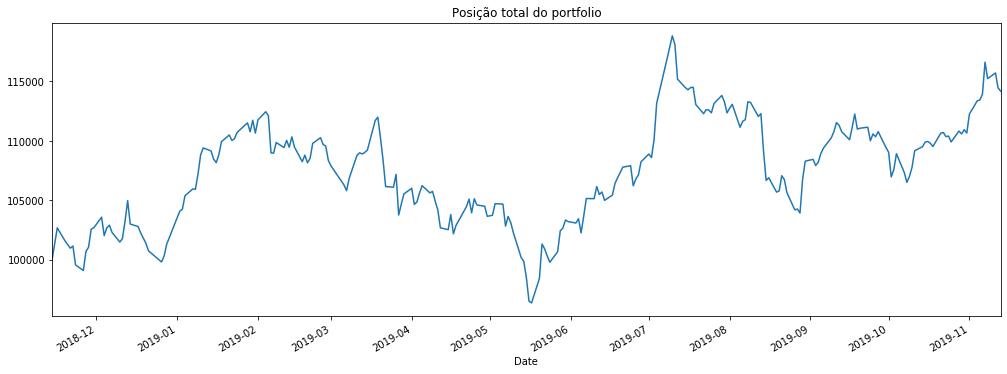

In [54]:
portfolio_posicao['Total'].plot(figsize=(17,6))
plt.title('Posição total do portfolio');

## Desempenho da Carteira Normalizada

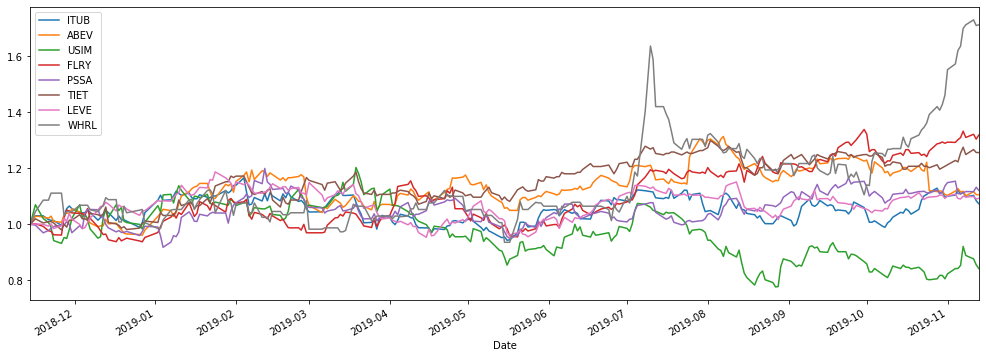

In [56]:
portfolio_normalizado = portfolio_acoes / portfolio_acoes.iloc[0]
portfolio_normalizado.plot(figsize=(17,6));

## Retorno diário da carteira

In [57]:
portfolio_posicao['Retorno Diario'] = portfolio_posicao['Total'].pct_change(1)

In [58]:
# Média de retorno diário
round_ret_medio_diario = round(portfolio_posicao['Retorno Diario'].mean() * 100, 2)
print('Essa carteira rende em média {}% diariamente'.format(round_ret_medio_diario))

Essa carteira rende em média 0.06% diariamente


In [59]:
# Desvio Padrão do retorno diário
portfolio_posicao['Retorno Diario'].std()

0.010376417683633607

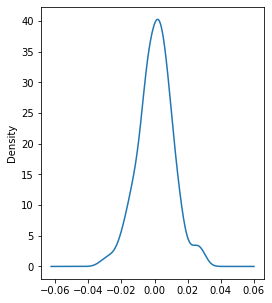

In [60]:
# Gráfico de densidade
portfolio_posicao['Retorno Diario'].plot(kind='kde', figsize=(4,5));

In [80]:
print('Nos últimos 12 meses houve {} pregões.'.format(len(portfolio_posicao)))
print('Sendo que {} dias foram de queda e {} dias de alta'
      .format(len(portfolio_posicao[portfolio_posicao['Retorno Diario'] > 0]),
             len(portfolio_posicao[portfolio_posicao['Retorno Diario'] < 0])))

Nos últimos 12 meses houve 248 pregões.
Sendo que 134 dias foram de queda e 113 dias de alta


## Retorno Total da Carteira

In [39]:
retorno_total_acumulado = 100 * (portfolio_posicao['Total'][-1] / portfolio_posicao['Total'][0] - 1)
round_ret = round(retorno_total_acumulado, 3)
print('Essa carteira rendeu {}%'.format(round_ret))

Essa carteira rendeu 9.982%
